In [20]:
# Dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [21]:
# More dependencies

import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [23]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [24]:
# reflect an existing database into a new model

# reflect the tables

Base = automap_base()
Base.prepare(autoload_with=engine)
Base.metadata.create_all(engine)

In [25]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table

Station = Base.classes.station
Measurement = Base.classes.measurement

In [27]:
# Create our session (link) from Python to the DB

session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
# Use the read_csv function to read in the hawaii_measurements file

hawaii_measurements = pd.read_csv("..\\Starter Code for SQLAlchemy Challenge\\Resources\\hawaii_measurements.csv")

# Use the max function to get the most recent date

most_recent_date = hawaii_measurements["date"].max()
most_recent_date

'2017-08-23'

2016-08-23


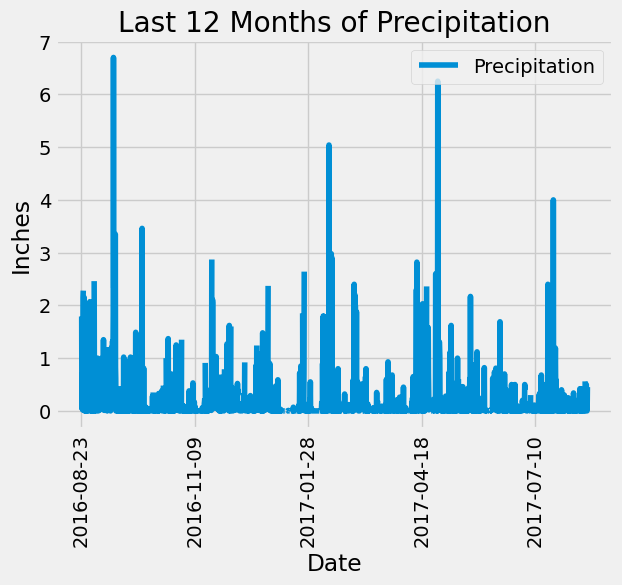

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

one_year_ago = datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Date formatting

one_year_ago = one_year_ago.strftime('%Y-%m-%d')
print(one_year_ago)

# Perform a query to retrieve the date and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago)

precipitation_df = pd.DataFrame(precipitation, columns = ("Date", "Precipitation"))


# Sort the dataframe by date

precipitation_df = precipitation_df.sort_values(by="Date")


# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(x="Date", y="Precipitation", rot = 90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Last 12 Months of Precipitation")
plt.xticks()
plt.legend(["Precipitation"], loc = 'upper right')
plt.show()


In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Most active station

h_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).first()

# Maximum temperature for the most active station.

h_station_max = session.query(Measurement.station, func.max(Measurement.tobs)).group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).first()

# Minimum temperature for the most active station.

h_station_min = session.query(Measurement.station, func.min(Measurement.tobs)).group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).first()

# Average temperature for the most active station.

h_station_avg = session.query(Measurement.station, func.avg(Measurement.tobs)).group_by(Measurement.station).\
    order_by(desc(func.count(Measurement.station))).first()



print(f"First Station: {h_station[0]}")
print(f"Maximum Temperature: {h_station_max[1]}")
print(f"Minimum Temperature: {h_station_min[1]}")
print(f"Average Temperature: {h_station_avg[1]}")



First Station: USC00519281
Maximum Temperature: 85.0
Minimum Temperature: 54.0
Average Temperature: 71.66378066378067


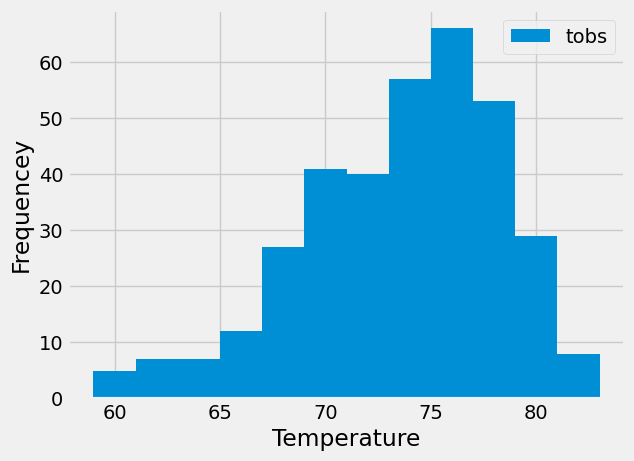

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temperature_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= one_year_ago).\
    filter(Measurement.station == h_station[0])

# DataFrame for the tobs of the most active station for the last 12 months.

temperature_df = pd.DataFrame(temperature_data, columns = ("Date", "Temperature"))
temperature_df

# Histogram of the tobs of the most active station for the last 12 months.

plt.hist(temperature_df["Temperature"], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequencey")
plt.legend(["tobs"], loc = 'upper right');

# Close Session

In [35]:
# Close Session

session.close()